# Final Project: Marcov Chain Monte Carlo

## Implement Metropolis-Hastings on a Continuous Scalar Distribution

### Task 1: Implement MH on same continuous distribution that was assigned on the MT project.
$g(x) = x^2e^{-\frac{x^3}{3}}$

$x_1 = 2^{1/3}$

$f_s(x) = cg(x), x > x_1$

$c = e^{2/3}$

So:

$f_s(x) = e^{2/3}x^2e^{-\frac{x^3}{3}}, x >  2^{1/3}$


In [1]:
#Import relevant libraries
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Define restricted weibull function
def weibull(x):
    if x > 2**(1/3):
        p = np.exp(2/3)*x**2*np.exp(-x**3/3)
    else:
        p = 0
    return p

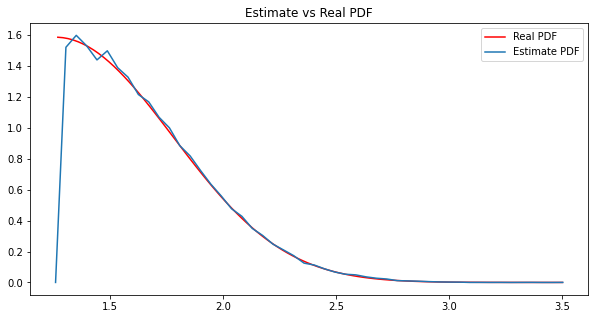

In [51]:
#Metropolis-Hastings algorithm

#Define number of samples
nsamples = 500000

#Initialize s vector with nsamples and sample 0
s = np.zeros((nsamples,1))
s[0] = 2

#Compute samples using algorithm
for i in range(1,nsamples):
    #Sample value of xprime using a symmetric distribution
    xprime = s[i-1]+(np.random.randn())

    #Find probability of acceptance
    alpha = weibull(xprime)/weibull(s[i-1])

    #Accept or reject the sample based on probability alpha
    if np.random.rand() < alpha:
        s[i] = xprime
    else: 
        s[i] = s[i-1]

#Plots PDF Estimate and Real PDF
#Generates bins of size delta
delta = .02
xmin = min(s)
xmax = max(s)
bincenters = np.linspace(xmin,xmax,int(1/delta))

#PDF Estimate
pdf_est = np.zeros(len(bincenters))
for i in range(1,len(bincenters)):
    pdf_est[i] = np.count_nonzero((s > bincenters[i]-delta/2) & (s <= bincenters[i]+delta/2) )/nsamples/delta; 

#Real pdf
xvals = np.linspace(2**(1/3)+.01,3.5,100)
yvals = np.zeros((100,1))
for x in range(len(xvals)):
    yvals[x] = weibull(xvals[x])

#Plots PDF Estimate and Real PDF
plt.figure(figsize=(10,5)) 
plt.title("Estimate vs Real PDF")
plt.plot(xvals,yvals, 'r',label = "Real PDF")
plt.plot(bincenters,pdf_est, label = "Estimate PDF")
plt.legend()

### Task 2: Estimate and plot the PDF of $X[n]$ for $n=1,3,10,30,100$

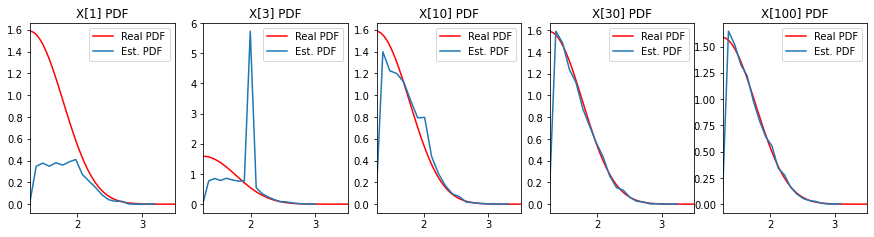

In [52]:
### Task 2: Estimate and plot the PDF of $X[n]$ for $n=1,3,10,30,100$
#Set values for n
n_vals = [1, 3, 10, 30, 100]

#Define number of samples
nsamples = 10000

#Initialize plot
plt_num = 0
fig, axs = plt.subplots(1,5, figsize=(15,3.5))

#Loop through values of n
for n_val in n_vals:

    #Initialize s vector with nsamples and sample 0
    s = np.zeros((n_val+1,1))
    s[0] = 2

    #Initialize vector to save values
    final_s = np.zeros((nsamples,1))

    #Compute samples using algorithm
    for j in range(nsamples):

        #Compute samples using algorithm
        for i in range(1,n_val+1):
            #Sample value of xprime using a symmetric distribution
            xprime = s[i-1]+(np.random.randn())

            #Find probability of acceptance
            alpha = weibull(xprime)/weibull(s[i-1])

            #Accept or reject the sample based on probability alpha
            if np.random.rand() < alpha:
                s[i] = xprime
            else: 
                s[i] = s[i-1]
        final_s[j] = s[i]
    


    #Plots PDF Estimate and Real PDF
    #Generates bins of size delta
    delta = .05
    xmin = min(final_s)
    xmax = max(final_s)
    bincenters = np.linspace(xmin,xmax,int(1/delta))

    #PDF Estimate
    pdf_est = np.zeros(len(bincenters))
    for i in range(1,len(bincenters)):
        pdf_est[i] = np.count_nonzero((final_s > bincenters[i]-delta/2) & (final_s <= bincenters[i]+delta/2) )/nsamples/delta; 

    #Plots PDF Estimate and Real PDF
    axs[plt_num].plot(xvals,yvals, 'r',label = "Real PDF")
    axs[plt_num].plot(bincenters,pdf_est,label = "Est. PDF")
    axs[plt_num].set_title("X["+str(n_val)+"] PDF")
    axs[plt_num].set_xlim(2**(1/3)+.01,3.5)
    axs[plt_num].legend()
    plt_num += 1
plt.show()

### Task 3: Repeat Task 2 for each of the following conditional distributions g:
$g(x'|x)=N(x,10)$

$g(x'|x)=N(x,0.1)$

$g(x'|x)=U(x-0.5,x+0.5)$


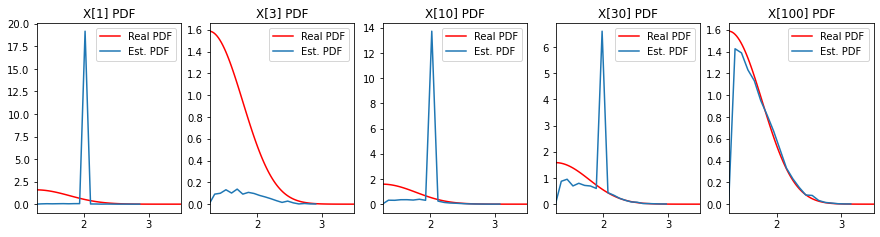

In [53]:
#g(x'|x) = N(x,10)

#Initialize plot
plt_num = 0
fig, axs = plt.subplots(1,5, figsize=(15,3.5))

#Loop through values of n
for n_val in n_vals:

    #Initialize s vector with nsamples and sample 0
    s = np.zeros((n_val+1,1))
    s[0] = 2

    #Initialize vector to save values
    final_s = np.zeros((nsamples,1))

    #Compute samples using algorithm
    for j in range(nsamples):

        #Compute samples using algorithm
        for i in range(1,n_val+1):
            #Sample value of xprime using a symmetric distribution
            xprime = s[i-1]+(10*np.random.randn())

            #Find probability of acceptance
            alpha = weibull(xprime)/weibull(s[i-1])

            #Accept or reject the sample based on probability alpha
            if np.random.rand() < alpha:
                s[i] = xprime
            else: 
                s[i] = s[i-1]
        final_s[j] = s[i]
    


    #Plots PDF Estimate and Real PDF
    #Generates bins of size delta
    delta = .05
    xmin = min(final_s)
    xmax = max(final_s)
    bincenters = np.linspace(xmin,xmax,int(1/delta))

    #PDF Estimate
    pdf_est = np.zeros(len(bincenters))
    for i in range(1,len(bincenters)):
        pdf_est[i] = np.count_nonzero((final_s > bincenters[i]-delta/2) & (final_s <= bincenters[i]+delta/2) )/nsamples/delta; 

    #Plots PDF Estimate and Real PDF
    axs[plt_num].plot(xvals,yvals, 'r',label = "Real PDF")
    axs[plt_num].plot(bincenters,pdf_est,label = "Est. PDF")
    axs[plt_num].set_title("X["+str(n_val)+"] PDF")
    axs[plt_num].set_xlim(2**(1/3)+.01,3.5)
    axs[plt_num].legend()
    plt_num += 1
plt.show()

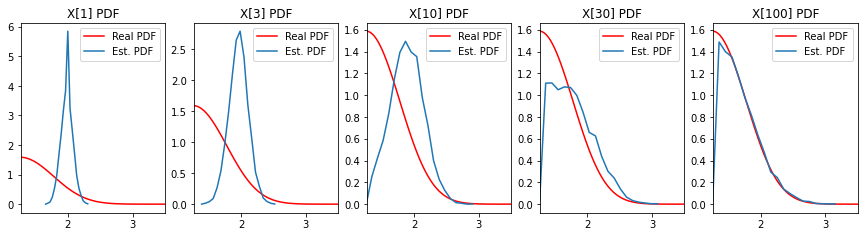

In [54]:
#g(x'|x) = N(x,0.1)

#Initialize plot
plt_num = 0
fig, axs = plt.subplots(1,5, figsize=(15,3.5))

#Loop through values of n
for n_val in n_vals:

    #Initialize s vector with nsamples and sample 0
    s = np.zeros((n_val+1,1))
    s[0] = 2

    #Initialize vector to save values
    final_s = np.zeros((nsamples,1))

    #Compute samples using algorithm
    for j in range(nsamples):

        #Compute samples using algorithm
        for i in range(1,n_val+1):
            #Sample value of xprime using a symmetric distribution
            xprime = s[i-1]+(0.1*np.random.randn())

            #Find probability of acceptance
            alpha = weibull(xprime)/weibull(s[i-1])

            #Accept or reject the sample based on probability alpha
            if np.random.rand() < alpha:
                s[i] = xprime
            else: 
                s[i] = s[i-1]
        final_s[j] = s[i]
    


    #Plots PDF Estimate and Real PDF
    #Generates bins of size delta
    delta = .05
    xmin = min(final_s)
    xmax = max(final_s)
    bincenters = np.linspace(xmin,xmax,int(1/delta))

    #PDF Estimate
    pdf_est = np.zeros(len(bincenters))
    for i in range(1,len(bincenters)):
        pdf_est[i] = np.count_nonzero((final_s > bincenters[i]-delta/2) & (final_s <= bincenters[i]+delta/2) )/nsamples/delta; 

    #Plots PDF Estimate and Real PDF
    axs[plt_num].plot(xvals,yvals, 'r',label = "Real PDF")
    axs[plt_num].plot(bincenters,pdf_est,label = "Est. PDF")
    axs[plt_num].set_title("X["+str(n_val)+"] PDF")
    axs[plt_num].set_xlim(2**(1/3)+.01,3.5)
    axs[plt_num].legend()
    plt_num += 1
plt.show()

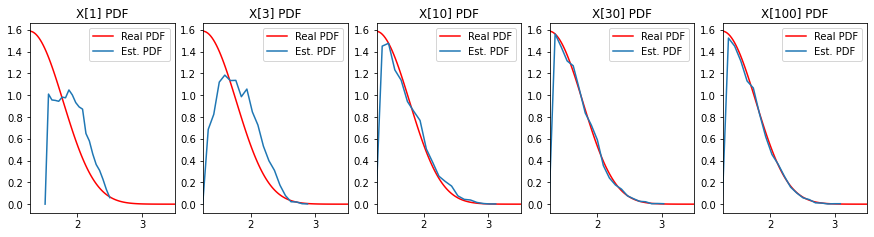

In [55]:
#g(x'|x) = U(x-0.5,x+0.5)

#Initialize plot
plt_num = 0
fig, axs = plt.subplots(1,5, figsize=(15,3.5))

#Loop through values of n
for n_val in n_vals:

    #Initialize s vector with nsamples and sample 0
    s = np.zeros((n_val+1,1))
    s[0] = 2

    #Initialize vector to save values
    final_s = np.zeros((nsamples,1))

    #Compute samples using algorithm
    for j in range(nsamples):

        #Compute samples using algorithm
        for i in range(1,n_val+1):
            #Sample value of xprime using a symmetric distribution
            xprime = s[i-1]+(np.random.uniform(-.5,.5))

            #Find probability of acceptance
            alpha = weibull(xprime)/weibull(s[i-1])

            #Accept or reject the sample based on probability alpha
            if np.random.rand() < alpha:
                s[i] = xprime
            else: 
                s[i] = s[i-1]
        final_s[j] = s[i]
    


    #Plots PDF Estimate and Real PDF
    #Generates bins of size delta
    delta = .05
    xmin = min(final_s)
    xmax = max(final_s)
    bincenters = np.linspace(xmin,xmax,int(1/delta))

    #PDF Estimate
    pdf_est = np.zeros(len(bincenters))
    for i in range(1,len(bincenters)):
        pdf_est[i] = np.count_nonzero((final_s > bincenters[i]-delta/2) & (final_s <= bincenters[i]+delta/2) )/nsamples/delta; 

    #Plots PDF Estimate and Real PDF
    axs[plt_num].plot(xvals,yvals, 'r',label = "Real PDF")
    axs[plt_num].plot(bincenters,pdf_est,label = "Est. PDF")
    axs[plt_num].set_title("X["+str(n_val)+"] PDF")
    axs[plt_num].set_xlim(2**(1/3)+.01,3.5)
    axs[plt_num].legend()
    plt_num += 1
plt.show()